# Description
This notebook is showing how Simulation API could be used in a notebook style. The short notebook is displaying how to create a simulation and visualize its report

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
from collections import namedtuple

In [2]:
url = "http://localhost:8080"

In [3]:
create_url = url + "/simulation"

In [4]:
report_url = url + '/report'

# Create Simulation

In [5]:
payload = '{"name":"Some name 2","description":"Some description","topology":{"application-servers":[{"name":"App Server 1","cpu_units":1,"memory_units":2048},{"name":"App Server 2","cpu_units":1,"memory_units":2048}],"database-servers":[{"name":"DB Server 1","disk_units":5120}]},"scenario":{"duration_days":10,"step_avg":5,"login_percentage":0.2}}'

In [6]:
headers = {
    'content-type': "application/json"
    }

In [53]:
response = requests.request("POST", create_url, data=payload, headers=headers)
response # should be 201 - Created

<Response [201]>

In [45]:
response.text # copy paste runtime_id to query string

'{"runtime_id":"93ef2a8e36b511eaa00aacde48001122","success":"Simulation created"}\n'

# Read Report

In [74]:
querystring = {"runtime_id": "a0a85c16391011eaa595acde48001122"}

In [75]:
response = requests.request("GET", report_url, params=querystring)
response # should be 200

<Response [200]>

In [76]:
# response.text

In [77]:
report = json.loads(response.text, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))

In [79]:
report.report[0]

X(name='App Server 1', type='APP_SERVER', metrics=X(C0=[], C1=[], C2=[]))

# Visualize Report

In [18]:
def visualize_metrics(data, title="Usage"):
    data_frame = pd.DataFrame(data,
                              columns=["step", "usage", "queue"])
    data_frame = data_frame.groupby(["step"]).max()
    # data_frame.to_csv('rep.csv')

    plt.subplot(2, 1, 1)
    plt.plot(data_frame["usage"])
    plt.title(title)
    plt.margins()
    plt.subplot(2, 1, 2)
    plt.plot(data_frame["queue"])
    plt.title("Requests in queue")
    plt.subplots_adjust(hspace=0.5)
    plt.show()

## Server 1

In [73]:
df_list = []
for server in servers:
    for component in server.metrics:
        df = pd.DataFrame(component, columns=["step", "cpu_usage", "queue"])
        df_list.append(df)

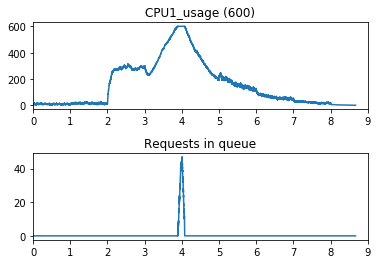

In [67]:
data_frame = df_list[0]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU1_usage (600)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)

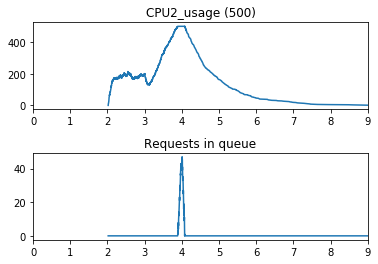

In [69]:
data_frame = df_list[1]
data_frame = data_frame.groupby(["step"]).max()
plt.subplot(2, 1, 1)
plt.plot(data_frame["cpu_usage"])
plt.xlim(0,9)
plt.title("CPU2_usage (500)")
plt.margins()
plt.subplot(2, 1, 2)
plt.plot(data_frame["queue"])
plt.xlim(0,9)
plt.title("Requests in queue")
plt.subplots_adjust(hspace=0.5)